In [1]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.family'] = 'SimHei'  # 设置字体为黑体
mpl.rcParams['axes.unicode_minus'] = False  # 设置在中文字体是能够正常显示负号（“-”）
import matplotlib.pyplot as plt

from cavag.gaussbeam import *

# Hermite-Gaussian Beam

**展示必要的参数列表**

In [2]:
print('HermiteGaussBeam2D:', HermiteGaussBeam2D.modifiable_properties)

HermiteGaussBeam2D: ('A0', 'wavelength', 'p0', 'omega0x', 'omega0y', 'mx', 'my')


**设置参数**

In [3]:
# 注意所有同量纲的参数都应该有相同单位
A0 = 1.0  # 振幅
wavelength = 1.55  # 波长um
p0 = 0  # 位置um
omega0x = 1.2 # 束腰半径um
omega0y = 2.2 # 束腰半径um
mx = 3 # x方向模式
my = 2 # y方向模式

**实例化**

In [4]:
hgb2d = HermiteGaussBeam2D(wavelength=wavelength, A0=A0, p0=p0, omega0x=omega0x, omega0y=omega0y,
                        mx=mx, my=my)
print(hgb2d)

HermiteGaussBeam2D:
    振幅　　　　　　　　　　　　　A0         =
        1.0
    总归一化因子　　　　　　　　　c          =
        0.02505950486932399
    ｘ方向归一化因子　　　　　　　cx         =
        0.11769521024212767
    ｙ方向归一化因子　　　　　　　cy         =
        0.21291864654279893
    ｘ方向Ｈｅｒｍｉｔｅ多项式　　hmx        =
           3
        8 x - 12 x
    ｙ方向Ｈｅｒｍｉｔｅ多项式　　hmy        =
           2
        4 x - 2
    波矢［Ｌ＾（－１）］　　　　　k          =
        4.053667940115862
    ｘ方向光的模式数　　　　　　　mx         =
        3
    ｙ方向光的模式数　　　　　　　my         =
        2
    频率［Ｔ＾（－１）］　　　　　nu         =
        193414489.03225806
    角频率［Ｔ＾（－１）］　　　　nu_angular =
        1215259075.683131
    ｘ方向束腰半径　　　　　　　　omega0x    =
        1.2
    ｙ方向束腰半径　　　　　　　　omega0y    =
        2.2
    束腰位置　　　　　　　　　　　p0         =
        0
    波长［Ｌ］　　　　　　　　　　wavelength =
        1.55
    ｘ方向瑞利长度　　　　　　　　z0x        =
        2.9186409168834206
    ｙ方向瑞利长度　　　　　　　　z0y        =
        9.809876415080387



**展示HG随光轴的属性变化**

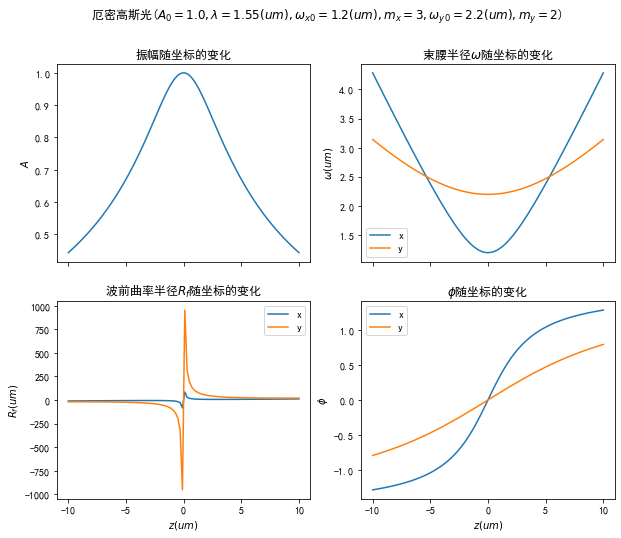

In [5]:
z = np.linspace(-10, 10, num=100)  # -10~10um

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,8))

fig.suptitle('厄密高斯光($A_0=%s,\lambda=%s(um),{\omega_x}_0=%s(um),m_x=%s,'
             '{\omega_y}_0=%s(um),m_y=%s$)'%(A0,wavelength,omega0x,mx,omega0y,my))

axes[0,0].plot(z, hgb2d.A_f(z))
axes[0,0].set_title(r'振幅随坐标的变化')
axes[0,0].set_ylabel(r'$A$')

axes[0,1].set_title(r'束腰半径$\omega$随坐标的变化')
axes[0,1].set_ylabel(r'$\omega(um)$')
axes[0,1].plot(z, hgb2d.omegax_f(z), label='x')
axes[0,1].plot(z, hgb2d.omegay_f(z), label='y')
axes[0,1].legend()

axes[1,0].set_title(r'波前曲率半径$R_f$随坐标的变化')
axes[1,0].set_ylabel(r'$R_f(um)$')
axes[1,0].plot(z, hgb2d.Rx_f(z), label='x')
axes[1,0].plot(z, hgb2d.Ry_f(z), label='y')
axes[1,0].legend()

axes[1,1].set_title(r'$\phi$随坐标的变化')
axes[1,1].set_ylabel(r'$\phi$')
axes[1,1].plot(z, hgb2d.phix_f(z), label='x')
axes[1,1].plot(z, hgb2d.phiy_f(z), label='y')
axes[1,1].legend()

axes[1,0].set_xlabel(r'$z(um)$')
axes[1,1].set_xlabel(r'$z(um)$')

fig.savefig('../picture/res/gaussbeam/hermitegaussbeam_z_direction.png')

**展示HG截面的属性**

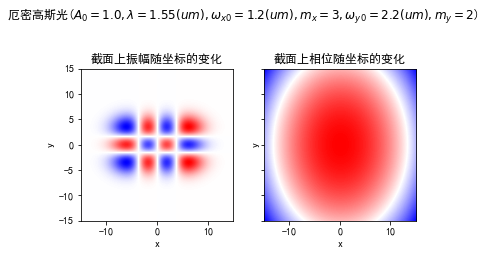

In [6]:
zt = 10
extent = (-15,15,-15,15)
y, x = np.mgrid[extent[2]:extent[3]:150j, extent[0]:extent[1]:150j]

ampl, phase = hgb2d.u_f(zt, x, y)

vm = np.max(ampl)

fig, axes = plt.subplots(1, 2, figsize=(6,4), sharex=True, sharey=True)

fig.suptitle(r'厄密高斯光($A_0=%s,\lambda=%s(um),{\omega_x}_0=%s(um),m_x=%s,'
             '{\omega_y}_0=%s(um),m_y=%s$)'%(A0,wavelength,omega0x,mx,omega0y,my))

axes[0].imshow(ampl, extent=extent, vmax=vm, vmin=-vm, cmap=plt.cm.get_cmap('bwr'), origin='lower')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('截面上振幅随坐标的变化')

axes[1].imshow(phase, extent=extent, cmap=plt.cm.get_cmap('bwr'), origin='lower')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('截面上相位随坐标的变化')

fig.savefig('../picture/res/gaussbeam/hermitegaussbeam_crosssection.png')

# Symmetric Hermite-Gaussian Beam

## Symmetric Herimite-Gaussian Beam

**展示必要的参数列表**

In [7]:
print('SymmetricHermiteGaussBeam:', SymmetricHermiteGaussBeam.modifiable_properties)

SymmetricHermiteGaussBeam: ('A0', 'p0', 'wavelength', 'omega0', 'm')


**设置参数**

In [8]:
# 注意所有同量纲的参数都应该有相同单位
A0 = 1.0  # 振幅
wavelength = 1.55  # 波长um
p0 = 0  # 位置um
omega0 = 1.0 # 束腰半径um
m = 2 # 模式

**实例化**

In [9]:
shgb2d = SymmetricHermiteGaussBeam(wavelength=wavelength, A0=A0, p0=p0, omega0=omega0, m=m)
print(shgb2d)

SymmetricHermiteGaussBeam:
    振幅　　　　　　　　　　　　　A0         =
        1.0
    总归一化因子　　　　　　　　　c          =
        0.09973557010035816
    Ｈｅｒｍｉｔｅ多项式　　　　　hm         =
           2
        4 x - 2
    波矢［Ｌ＾（－１）］　　　　　k          =
        4.053667940115862
    光的模式数　　　　　　　　　　m          =
        2
    频率［Ｔ＾（－１）］　　　　　nu         =
        193414489.03225806
    角频率［Ｔ＾（－１）］　　　　nu_angular =
        1215259075.683131
    束腰半径　　　　　　　　　　　omega0     =
        1.0
    束腰位置　　　　　　　　　　　p0         =
        0
    波长［Ｌ］　　　　　　　　　　wavelength =
        1.55
    瑞利长度　　　　　　　　　　　z0         =
        2.026833970057931



**展示HG随光轴的属性变化**

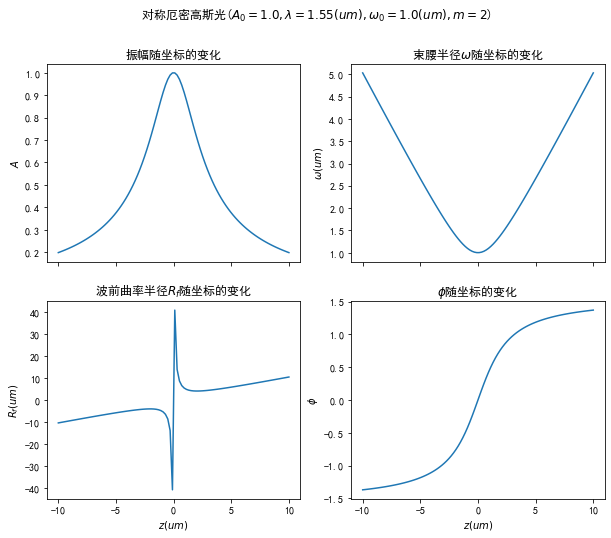

In [10]:
z = np.linspace(-10, 10, num=100)  # -10~10um

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,8))

fig.suptitle(r'对称厄密高斯光($A_0=%s,\lambda=%s(um),{\omega}_0=%s(um),m=%s$)'%(A0,wavelength,omega0,m))

axes[0,0].plot(z, shgb2d.A_f(z))
axes[0,0].set_title(r'振幅随坐标的变化')
axes[0,0].set_ylabel(r'$A$')

axes[0,1].plot(z, shgb2d.omega_f(z))
axes[0,1].set_title(r'束腰半径$\omega$随坐标的变化')
axes[0,1].set_ylabel(r'$\omega(um)$')

axes[1,0].plot(z, shgb2d.R_f(z))
axes[1,0].set_title(r'波前曲率半径$R_f$随坐标的变化')
axes[1,0].set_ylabel(r'$R_f(um)$')

axes[1,1].plot(z, shgb2d.phi_f(z))
axes[1,1].set_title(r'$\phi$随坐标的变化')
axes[1,1].set_ylabel(r'$\phi$')

axes[1,0].set_xlabel(r'$z(um)$')
axes[1,1].set_xlabel(r'$z(um)$')

fig.savefig('../picture/res/gaussbeam/symmetrichermitegaussbeam_z_direction.png')

**展示HG截面的属性**

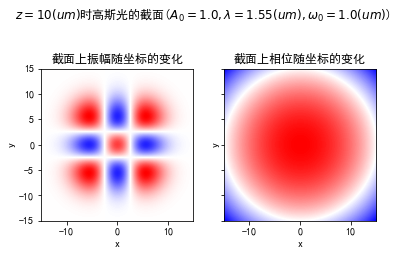

In [11]:
zt = 10
extent = (-15,15,-15,15)
y, x = np.mgrid[extent[2]:extent[3]:150j, extent[0]:extent[1]:150j]

ampl, phase = shgb2d.u_f(zt, x, y)

vm = np.max(ampl)

fig, axes = plt.subplots(1, 2, figsize=(6,4), sharex=True, sharey=True)

fig.suptitle(r'$z=%d(um)$时高斯光的截面($A_0=%s,\lambda=%s(um),\omega_0=%s(um)$)'%(zt,A0,wavelength,omega0))

axes[0].imshow(ampl, extent=extent, vmax=vm, vmin=-vm, cmap=plt.cm.get_cmap('bwr'), origin='lower')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('截面上振幅随坐标的变化')

axes[1].imshow(phase, extent=extent, cmap=plt.cm.get_cmap('bwr'), origin='lower')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('截面上相位随坐标的变化')

fig.savefig('../picture/res/gaussbeam/symmetrichermitegaussbeam_crosssection.png')

## Symmetric Gaussian Beam

**展示必要的参数列表**

In [12]:
print('SymmetricGaussBeam:', SymmetricGaussBeam.modifiable_properties)

SymmetricGaussBeam: ('A0', 'wavelength', 'p0', 'omega0')


**设置参数**

In [13]:
# 注意所有同量纲的参数都应该有相同单位
A0 = 1.0  # 振幅
wavelength = 1.55  # 波长um
p0 = 0  # 位置um
omega0 = 1.2 # 束腰半径um

**实例化**

In [14]:
sgb = SymmetricGaussBeam(wavelength=wavelength, A0=A0, p0=p0, omega0=omega0)
print(sgb)

SymmetricGaussBeam:
    振幅　　　　　　　　　　　　　A0         =
        1.0
    总归一化因子　　　　　　　　　c          =
        0.6649038006690545
    Ｈｅｒｍｉｔｅ多项式　　　　　hm         =
 
        1
    波矢［Ｌ＾（－１）］　　　　　k          =
        4.053667940115862
    光的模式数　　　　　　　　　　m          =
        0
    频率［Ｔ＾（－１）］　　　　　nu         =
        193414489.03225806
    角频率［Ｔ＾（－１）］　　　　nu_angular =
        1215259075.683131
    束腰半径　　　　　　　　　　　omega0     =
        1.2
    束腰位置　　　　　　　　　　　p0         =
        0
    波长［Ｌ］　　　　　　　　　　wavelength =
        1.55
    瑞利长度　　　　　　　　　　　z0         =
        2.9186409168834206



**展示HG随光轴的属性变化**

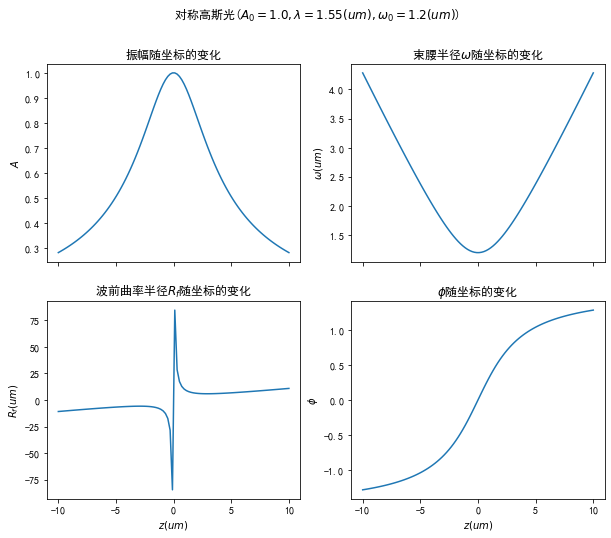

In [15]:
z = np.linspace(-10, 10, num=100)  # -10~10um

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,8))

fig.suptitle(r'对称高斯光($A_0=%s,\lambda=%s(um),\omega_0=%s(um)$)'%(A0,wavelength,omega0))

axes[0,0].plot(z, sgb.A_f(z))
axes[0,0].set_title(r'振幅随坐标的变化')
axes[0,0].set_ylabel(r'$A$')

axes[0,1].plot(z, sgb.omega_f(z))
axes[0,1].set_title(r'束腰半径$\omega$随坐标的变化')
axes[0,1].set_ylabel(r'$\omega(um)$')

axes[1,0].plot(z, sgb.R_f(z))
axes[1,0].set_title(r'波前曲率半径$R_f$随坐标的变化')
axes[1,0].set_ylabel(r'$R_f(um)$')

axes[1,1].plot(z, sgb.phi_f(z))
axes[1,1].set_title(r'$\phi$随坐标的变化')
axes[1,1].set_ylabel(r'$\phi$')

axes[1,0].set_xlabel(r'$z(um)$')
axes[1,1].set_xlabel(r'$z(um)$')

fig.savefig('../picture/res/gaussbeam/gaussbeam_z_direction.png')

**展示HG截面的属性**

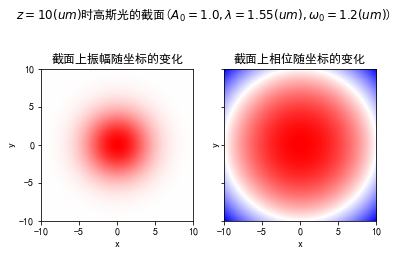

In [16]:
zt = 10
extent = (-10,10,-10,10)
y, x = np.mgrid[extent[2]:extent[3]:150j, extent[0]:extent[1]:150j]

ampl, phase = sgb.u_f(zt, x, y)

vm = np.max(ampl)

fig, axes = plt.subplots(1, 2, figsize=(6,4), sharex=True, sharey=True)

fig.suptitle(r'$z=%d(um)$时高斯光的截面($A_0=%s,\lambda=%s(um),\omega_0=%s(um)$)'%(zt,A0,wavelength,omega0))

axes[0].imshow(ampl, extent=extent, vmax=vm, vmin=-vm, cmap=plt.cm.get_cmap('bwr'), origin='lower')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('截面上振幅随坐标的变化')

axes[1].imshow(phase, extent=extent, cmap=plt.cm.get_cmap('bwr'), origin='lower')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('截面上相位随坐标的变化')

fig.savefig('../picture/res/gaussbeam/gaussbeam_crosssection.png')